In [1]:
import pandas as pd 
import json 
import matplotlib
import requests
import numpy as np
from citipy import citipy
import time
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
 
lats = np.random.randint(-90, 90, size=500)
longs = np.random.randint(-180, 180, size=500)
coords = pd.DataFrame({
    "latitude": lats,
    "longitude": longs
})


coords.head()

,latitude,longitude
0,-39,136
1,33,33
2,42,-40
3,21,-13
4,-77,90


In [13]:
API_KEY = "0a4016e3726b6db2c6c7cf29fe383496"
import requests
import time

def get_weather_data(coords, time_between=1):
    results = []
    for ind, row in coords.iterrows():
        lat, lon = row['latitude'], row['longitude']
        query = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&APPID={API_KEY}"
        clean_url = query.rpartition("&")[0]

       
        city = citipy.nearest_city(lat, lon)

        result = requests.get(query)
        results.append(result.json())
        time.sleep(time_between)
    return results

test_coords = pd.DataFrame({"latitude": [37], "longitude": [-122]})
test_results = get_weather_data(test_coords)
test_results

[{'coord': {'lon': -122, 'lat': 37},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 289.87,
   'pressure': 1015,
   'humidity': 72,
   'temp_min': 286.48,
   'temp_max': 293.15},
  'visibility': 16093,
  'wind': {'speed': 3.6, 'deg': 110},
  'clouds': {'all': 1},
  'dt': 1562122333,
  'sys': {'type': 1,
   'id': 6269,
   'message': 0.0107,
   'country': 'US',
   'sunrise': 1562071941,
   'sunset': 1562124684},
  'timezone': -25200,
  'id': 5381421,
  'name': 'Pasatiempo',
  'cod': 200}]

In [14]:
full_results= get_weather_data(coords)
full_results[:3]

[{'coord': {'lon': 136, 'lat': -39},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 285.746,
   'pressure': 1031.08,
   'humidity': 67,
   'temp_min': 285.746,
   'temp_max': 285.746,
   'sea_level': 1031.08,
   'grnd_level': 1031.28},
  'wind': {'speed': 1.55, 'deg': 2.813},
  'clouds': {'all': 0},
  'dt': 1562122795,
  'sys': {'message': 0.0073, 'sunrise': 1562105728, 'sunset': 1562139863},
  'timezone': 32400,
  'id': 0,
  'name': '',
  'cod': 200},
 {'coord': {'lon': 33, 'lat': 33},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 299.046,
   'pressure': 1009.09,
   'humidity': 71,
   'temp_min': 299.046,
   'temp_max': 299.046,
   'sea_level': 1009.09,
   'grnd_level': 1009.22},
  'wind': {'speed': 6.27, 'deg': 315.149},
  'clouds': {'all': 0},
  'dt': 1562122796,
  'sys': {'message': 0.0057, 'sunr

In [15]:
import json

with open("weather.json", "w") as outfile:
    json.dump(full_results, outfile)

In [16]:
def k_to_f(temp):
    """Converts a Kelvin temperature to Fahrenheit"""
    return temp * 9/5 - 459.67

def mps_to_mph(speed):
    """Converts a meters/s speed to miles/hour"""
    return speed * 2.23694

In [17]:
important_json_data = []
for point in full_results:
    lat = point['coord']['lat']
    lon = point['coord']['lon']
    temp = k_to_f(point['main']['temp'])
    humidity = point['main']['humidity']
    cloudiness = point['clouds']['all']
    wind = mps_to_mph(point['wind']['speed'])

    row = [lat, lon, temp, humidity, cloudiness, wind]
    important_json_data.append(row)

weather_df = pd.DataFrame(important_json_data)
weather_df.columns = [
    "latitude",
    "longitude",
    "temperature",
    "humidity",
    "clouds",
    "wind",
]
weather_df.head()

,latitude,longitude,temperature,humidity,clouds,wind
0,-39,136,54.6728,67,0,3.467257
1,33,33,78.6128,71,0,14.025614
2,42,-40,70.8728,93,0,16.284923
3,21,-13,87.4328,22,0,18.812665
4,-77,90,-47.0272,90,100,14.651957


In [18]:
weather_df.to_csv("weather.csv")

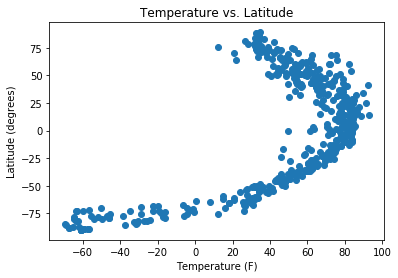

In [19]:
plt.scatter(weather_df.temperature, weather_df.latitude)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude (degrees)")
plt.title("Temperature vs. Latitude")
plt.show()

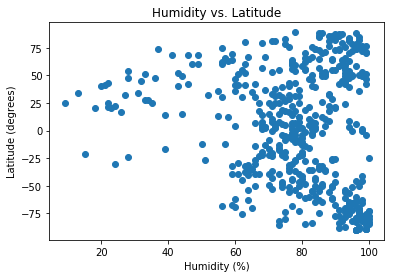

In [20]:
plt.scatter(weather_df.humidity, weather_df.latitude)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Humidity vs. Latitude")
plt.show()

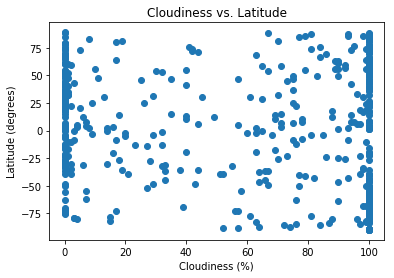

In [22]:
plt.scatter(weather_df.clouds, weather_df.latitude)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Cloudiness vs. Latitude")
plt.show()

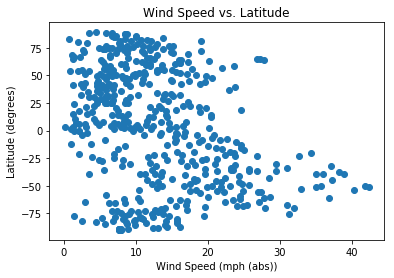

In [25]:
plt.scatter(weather_df.wind, weather_df.latitude)
plt.xlabel("Wind Speed (mph (abs))")
plt.ylabel("Latitude (degrees)")
plt.title("Wind Speed vs. Latitude")
plt.show()